### Das Problem bei solchen daten wird mit hilfe des Dission Tree

![](baum.png)

In [ ]:
import pandas as pd

In [5]:
#das ist data für gehalt bei konzerne zeigt ab wann verdient mann über 100.000 im jahr
df  = pd.read_excel("gehalt.xlsx")

In [28]:
df

,Unterhnehmn,job,gerad,gehalt
0,SAP,Manger,bachelor,1
1,SAP,Markiting,master,1
2,SAP,Informatiker,master,1
3,SAP,Manger,master,1
4,SAP,Markiting,bachelor,0
5,SAP,Informatiker,bachelor,0
6,Telekom,Informatiker,bachelor,0
7,Telekom,Manger,bachelor,0
8,Telekom,Markiting,bachelor,0
9,Telekom,Informatiker,master,1


In [10]:
# damit ich den gahlt predectken kann 
inputs = df.drop('gehalt',axis='columns')

In [11]:
target = df['gehalt']

In [12]:
#da ich nur zahlen haben müss also ich darf kein stirng haben deswegen muss alles mit zahlen ersetzen

from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [15]:
inputs['company_n'] = le_company.fit_transform(inputs['Unterhnehmn'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['gerad'])
inputs

,Unterhnehmn,job,gerad,company_n,job_n,degree_n
0,SAP,Manger,bachelor,1,1,0
1,SAP,Markiting,master,1,2,1
2,SAP,Informatiker,master,1,0,1
3,SAP,Manger,master,1,1,1
4,SAP,Markiting,bachelor,1,2,0
5,SAP,Informatiker,bachelor,1,0,0
6,Telekom,Informatiker,bachelor,2,0,0
7,Telekom,Manger,bachelor,2,1,0
8,Telekom,Markiting,bachelor,2,2,0
9,Telekom,Informatiker,master,2,0,1


In [18]:
inputs_n = inputs.drop(['Unterhnehmn','job','gerad'],axis='columns')

In [19]:
# unsere ziel ist 
target


0     1
1     1
2     1
3     1
4     0
5     0
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
Name: gehalt, dtype: int64

In [20]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [22]:
model.fit(inputs_n, target)


DecisionTreeClassifier()

In [23]:
model.score(inputs_n,target)


1.0

In [24]:
#SAP manger beachelor

model.predict([[1,1,0]])


array([1], dtype=int64)

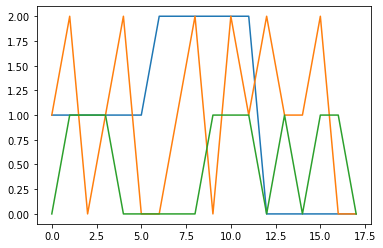

In [27]:
import matplotlib.pyplot as plt

plt.plot(inputs_n)